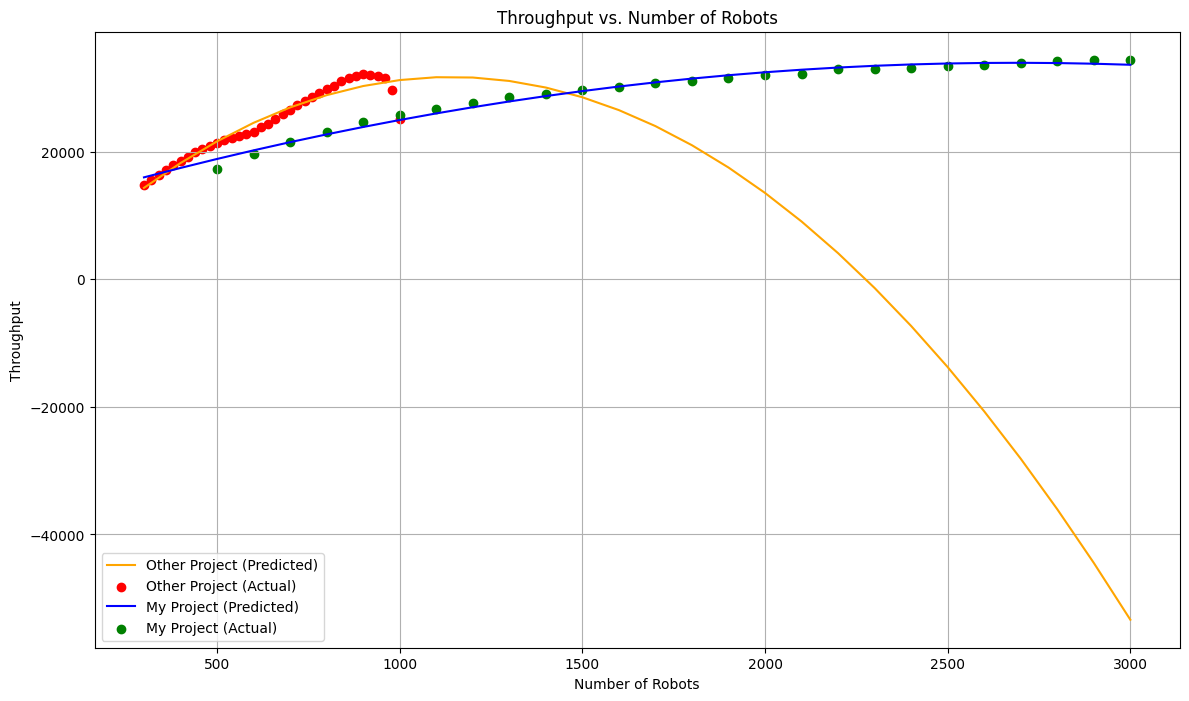

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data initialization
other_project_robots = np.array([300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000])
other_project_throughput = np.array([14730, 15617, 16409, 17109, 17878, 18511, 19164, 19939, 20364, 20821, 21339, 21849, 22175, 22518, 22741, 23131, 23820, 24419, 25160, 25913, 26491, 27298, 27971, 28606, 29247, 29799, 30328, 31138, 31598, 31825, 32199, 32093, 31828, 31481, 29695, 25178])

# Polynomial feature transformation
poly_features = PolynomialFeatures(degree=2)
other_project_robots_transformed = poly_features.fit_transform(other_project_robots.reshape(-1, 1))

# Fit model for other project
other_project_model = LinearRegression().fit(other_project_robots_transformed, other_project_throughput)

# My project data
my_project_robots = np.array([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000])
my_project_throughput = np.array([17241, 19597, 21575, 23091, 24621, 25675, 26730, 27691, 28510, 29098, 29598, 30215, 30826, 31152, 31536, 32054, 32130, 33024, 32901, 33184, 33467, 33601, 33845, 34228, 34329, 34418])

# Fit model for my project
my_project_robots_transformed = poly_features.fit_transform(my_project_robots.reshape(-1, 1))
my_project_model = LinearRegression().fit(my_project_robots_transformed, my_project_throughput)

# Prediction for both projects
predicted_robots_range = np.arange(300, 3001, 100).reshape(-1, 1)
predicted_throughput_other = other_project_model.predict(poly_features.transform(predicted_robots_range))
predicted_throughput_mine = my_project_model.predict(poly_features.transform(predicted_robots_range))

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(predicted_robots_range, predicted_throughput_other, label='Other Project (Predicted)', color='orange')
plt.scatter(other_project_robots, other_project_throughput, color='red', label='Other Project (Actual)')
plt.plot(predicted_robots_range, predicted_throughput_mine, label='My Project (Predicted)', color='blue')
plt.scatter(my_project_robots, my_project_throughput, color='green', label='My Project (Actual)')
plt.xlabel('Number of Robots')
plt.ylabel('Throughput')
plt.title('Throughput vs. Number of Robots')
plt.legend()
plt.grid(True)
plt.savefig('throughput_vs_robots.png', dpi=1200)  # Saves as a PNG file with 300 dpi
plt.show()